*This notebook is a part of a series, [Learning image manipulation in Python](#find), that covers the basics of working with images in [OpenCV](https://docs.opencv.org/), [Matplotlib](https://matplotlib.org/users/index.html) and [Numpy](https://numpy.org/doc/).*

# Blending images using Numpy operations

This notebooks covers the basics of blending images using simply operation in NumPy. These techniques can mimic many of the blending modes found in photo editing software like Adobe Photoshop. For more information about blending see [Blend modes](https://en.wikipedia.org/wiki/Blend_modes) article in Wikipedia.

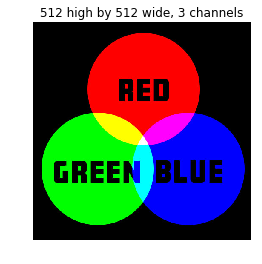

In [5]:
from matplotlib import pyplot as plt
import cv2

# Convenience function for displaying images
def showImage( image, title="" ):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load and convert image to RGB in a single line
image = cv2.cvtColor(cv2.imread("images/rgb.jpg"), cv2.COLOR_BGR2RGB)
showImage( image, title='%d high by %d wide, %d channels' % image.shape )

## Darken (minimum)

In [ ]:
def darken(top, bottom):
    return np.minimum(top, bottom)

showImage(darken(top, bottom))

## Multiply

In [ ]:
def multiply(top, bottom):
    return top * bottom

showImage(multiply(top, bottom))

## Color burn

In [ ]:
def colorBurn(top, bottom):
    result = 1 - ((1 - bottom) / top)
    return np.clip(result, 0, 1)

showImage(colorBurn(top, bottom))

## Linear burn

In [ ]:
def linearBurn(top, bottom):
    result = top + bottom - 1
    return np.clip(result, 0, 1)

showImage(linearBurn(top, bottom))

## Lighten (max)

In [3]:
def lighten(top, bottom):
    return np.maximum(top, bottom)

showImage(lighten(top, bottom))

NameError: name 'top' is not defined

## Screen

In [ ]:
def screen(top, bottom):
    result = 1 - (1 - top) * (1 - bottom)
    return np.clip(result, 0, 1)

showImage(screen(top, bottom))

## Color dodge

In [ ]:
def colorDodge(top, bottom):
    result = bottom / (1 - top)
    return np.clip(result, 0, 1)

showImage(colorDodge(top, bottom))

## Add (linear dodge)

In [ ]:
def linearDodge(top, bottom):
    result = top + bottom
    return np.clip(result, 0, 1)

showImage(linearDodge(top, bottom))

## Overlay

The overlay blend mode lightens the output if the bottom layer is light (>= 0.5) and darkens when the bottom layer is dark (< 0.5).

In [ ]:
def overlay(top, bottom):
    return np.where(bottom < 0.5, 2 * top * bottom, 1 - (1 - top) * (1 - bottom) )

showImage(overlay(top, bottom))

## Soft light

In [ ]:
def softLight(top, bottom):
    return (1 - 2 * top) * pow(bottom, 2) + 2 * top * bottom

showImage(softLight(top, bottom))

## Hard light

The hard light blend mode works similarly to the **overlay** blend mode, looking at the top layer to decide whether to darken or lighten. It lightens the output if the top layer is lighter and darkens when the top layer is dark.

In [ ]:
def hardLight(top, bottom):
    return np.where(top < 0.5, 2 * top * bottom, 1 - (1 - top) * (1 - bottom) )

showImage(hardLight2(top, bottom))

## Difference

Take the absolute difference of the two images

In [ ]:
def difference(top, bottom):
    return abs(top - bottom)

showImage(difference(top, bottom))

## Subtract

Take the difference of the two images mapping values below zero to black.

In [ ]:
def subtract(top, bottom):
    result = top - bottom
    return np.clip(result, 0, 1)

showImage(subtract(top, bottom))